# THE SPARKS FOUNDATION

# Author : -  Onkar Saudagar

## Task 1: Prediction using Supervised Learning

##### Predict the percentage of an student based on the no. of study hours.  This is a simple linear regression task as it involves just 2 variables.

The steps demonstrated in this notebook are:

            1. Loading the data
            2. Familiarizing with data
            3. Visualizing the data
            4. Optimum number of clusters using Elbow Method
            5. Model Building & Training
            6. Cluster Visualisation
            7. Conclusion

## 1. Loading Data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [2]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## 2. Data Familiarizing

In [3]:
# Shape of the data

df.shape

(25, 2)

In [4]:
# Listing the features(columns) of the dataframe
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
corr = df.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## 3. Visualizing the data

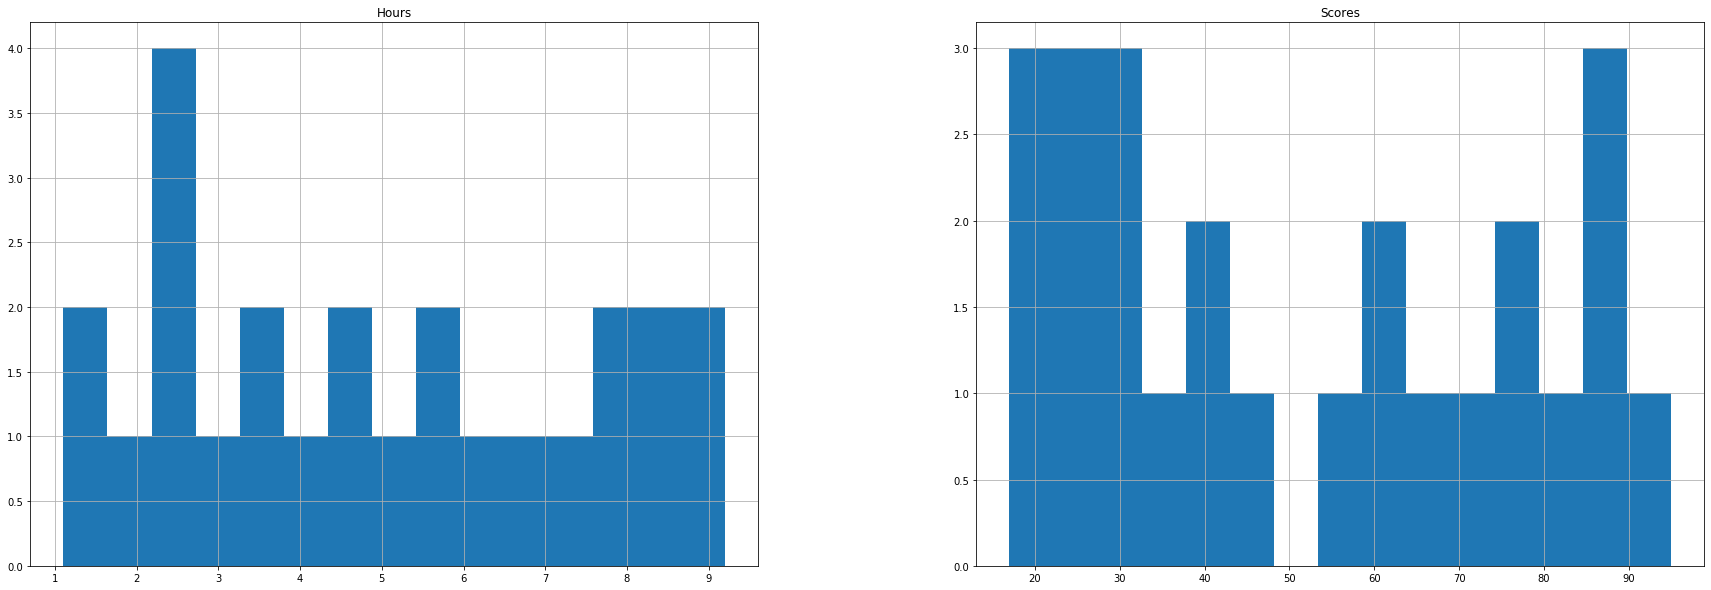

In [9]:
# HISTOGRAM

df.hist(bins=15, figsize=(30,10))
plt.show()

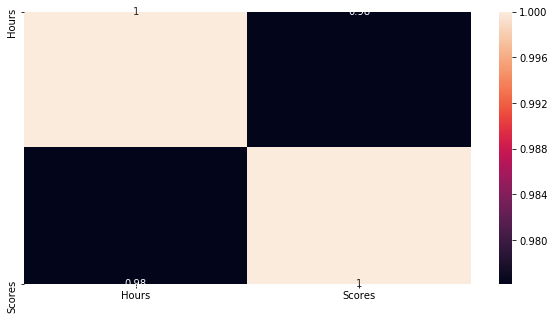

In [10]:
# HEATMAP
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True)
plt.show()

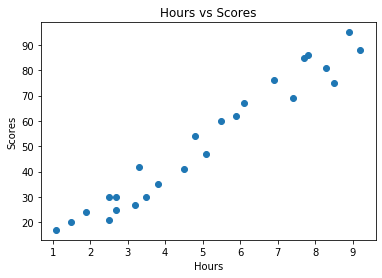

In [11]:
#scatter plot for visualization

plt.scatter(df["Hours"],df["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores");

In [12]:
# Spliting input and output 

y=df["Scores"]
X=df.drop("Scores",axis=1)

## 4. Splitting the Data

In [13]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
X_train.shape, X_test.shape


((20, 1), (5, 1))

## 5. Model Building & Training:

        Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

        There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook is Linear Regression

        The metrics considered to evaluate the model performance are Accuracy & Root Mean Squared Error.

In [14]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()

# fit the model 
lr.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [15]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

In [16]:
#importing required libraries 
from sklearn.metrics import mean_squared_error

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.942
Linear Regression: Accuracy on test Data: 0.974

Linear Regression: The RMSE of the training set is: 5.499305655945315
Linear Regression: The RMSE of the testing set is: 4.938382360637607


In [17]:
#checking for actual vs predicted value

dict={"Actual":y_train,"Predicted":y_train_lr}
new_data=pd.DataFrame(dict)
new_data=new_data.reset_index(drop=1)
new_data.head()

,Actual,Predicted
0,25,28.347571
1,75,86.003139
2,30,26.359448
3,41,46.240679
4,35,39.282248


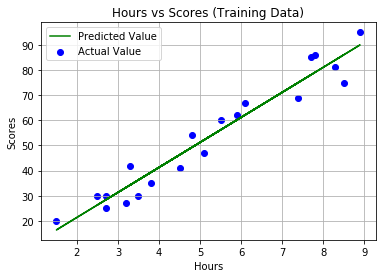

In [18]:
plt.scatter(X_train,y_train,label="Actual Value",color="blue")
plt.plot(X_train,y_train_lr,label="Predicted Value",color="green")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores (Training Data)")
plt.grid(True)
plt.legend();

In [19]:
#checking for actual vs predicted value

dict={"Actual":y_test,"Predicted":y_test_lr}
new_data=pd.DataFrame(dict)
new_data=new_data.reset_index(drop=1)
new_data

,Actual,Predicted
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


plt.scatter(X_test,y_test,label="Actual Value",color="blue")
plt.plot(X_train,y_train_lr,label="Predicted Value",color="green")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores (Testing Data)")
plt.grid(True)
plt.legend();

In [20]:
#predicted score if a student studies for 9.25 hrs/ day

result=lr.predict([[9.25]])
print("The Predicted score of student comes to be {:.3f} if a student studies for 9.25 hrs/ day.".format(result[0]))

The Predicted score of student comes to be 93.459 if a student studies for 9.25 hrs/ day.


## 6. Conclusion

        The final take away form this project is the working of Linear Regression model on a dataset and understanding their parameters. Creating this notebook helped me to learn a lot about the parameters of the models. Accuracy of model comes to be 97.4% and the Predicted score of student comes to be 93.459 if a student studies for 9.25 hrs/ day.